# 차원 축소(Dimension Reduction)

## 차원축소의 필요성
- 차원이 커질수록 $\uparrow$ 데이터 포인트들 간의 거리가 크게 늘어남/분산이 커짐 $\uparrow $ $→$ 데이터가 희소화(Sparse)되기 시작
  - 희소화 : 어느 특정한 공간에 데이터가 많이 들어가지 않는
  - 수 많은 Feature 데이터 포인트간의 거리에 기반한 머신러닝 알고리즘들이 무력화 될 수 있다.
- Feature가 많은 경우 개별 Feature간에 상관관계가 높아진다.
  - 선형 회귀 같은 모델의 경우, Feature간에 상관관계가 높으면 Feature 데이터의 분산이 커지기 때문에 다중 공선성 문제로 과적합이 되어, 모델의 예측 성능이 저하될 가능성이 매우 높다.
  - 차원이 커질 경우 데이터의 분산이 커지게 되어 다중 공산성 문제가 더 심하게 두드러질 것이다.
  - Feature는 선형 독립인 Feature로 만들어주는 것이 좋다.


## 차원축소의 장점
- 학습 데이터 크기를 줄여서 학습 시간을 절약할 수 있다.
- 불필요한 Feature들을 줄여서 모델 성능 향상에 기여할 수 있다.
- 다차원 데이터를 3차원 이하의 차원축소를 통해 시각적으로 보다 쉽게 데이터 패턴을 인지할 수 있다.
  - 일반적으로 사람이 이해할 수 있는 최대 차원이 3차원이기 때문에 차원축소로 데이터를 시각화할 수 있는 장점이 있다.

## 차원축소의 방식
### 1. 특성 선택(Feature Selection)
- 특성 탈락/제거(Feature Elimination) 방식
- 특정한 특성에 종속성이 강한 불필요한 특성은 아예 제거(drop)
  - 선형 종속인 Feature 데이터
  - 다른 Feature와 상관관계가 너무 높은 Feature
- 데이터의 특징을 잘 나타내는 주요 특성만 선택하는 것

### 2. 특성 추출(Feature Extraction)
- 기존 특성을 **저차원의 중요 특성으로 압축해서 새로운 특성으로 추출**하는 방식
- 새롭게 추출된 중요 특성은 기존의 특성을 반영해 합축된 것이지만, 새로운 특성으로 추출하게 된다.
- 단순하게 압축하는 것이 아니라, **특성을 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출**하는 것이다.
  - 공분산행렬, 특이값 분해를 이용한 K차원 근사를 통해 특이 벡터를 찾는 것
- 특성 추출방식으로 차원축소시 기존 데이터 세트에서 **잠재된 특성(Latent)**을 찾아낸다.
  - Latent를 찾을 수는 있지만, 명확히 어떤 특성을 의미하는 지는 바로 알 수 없다.
  - 전문 도메인 지식 등이 필요

## 차원축소의 목적
- 원본 데이터의 정보를 최대한으로 유지한 채 차원 축소를 수행하는 방법을 채택
- 차원축소는 좀 더 데이터를 잘 설명할 수있는 잠재적(Latent)인 요소를 추출하는데 의미가 있다.
- 대표적으로 추천엔진, 이미지 분류 및 변환, 문서 토픽 모델링 등에서 차원 축소가 사용됨

## 차원축소 알고리즘
머신러닝을 사용하는 목적은 **데이터의 패턴을 찾는 것**이다. 지도 학습에서는 머신러닝 알고리즘에 데이터를 훈련/테스트 세트로 분할해, 훈련 데이터로 모델을 학습시키고 훈련 및 테스트 세트에 대한 모델의 예측 성능을 확인할 수 있었다.

**차원축소 알고리즘은 머신러닝에서 비지도학습**에 해당한다. 차원축소 알고리즘의 목적은 데이터의 차원을 축소하는 변환을 수행하여, 데이터를 사람이 시각화할 수 있게 만들어 준다.

## 사이킷런에서 차원축소 알고리즘 종류
- PCA
- LDA
  - 지도학습의 분류(Classification)에서 사용하기 쉽도록 차원축소
  - 개별 클래스를 분별할 수 있는 기준을 최대한 유지
- SVD

---


## PCA(Principal Component Analysis)
- 주성분 분석
- 고차원의 원본 데이터를 저차원의 부분공간으로 **투영**하여 데이터를 축소하는 기법
- 원본 데이터가 가지는 **데이터 변동성(분산)**을 가장 중요한 정보로 간주한다.
  - 분류 알고리즘에서 분산이 커지면 과적합으로 모델의 예측 성능이 낮아질 수 있지만, 데이터 사이언스 쪽에서는 **데이터의 분산이 클 수록 분석하기 쉬운 데이터로 본다.**
- 즉, 고차원의 원본 데이터를 데이터 변동성(분산)에 기반하여 저차원의 부분공간으로 투영해 차원축소를 수행한다.

### PCA의 차원축소 프로세스
원본 데이터 변동성이 가장 큰 방향으로 순차적으로 축들을 생성하고, 생성된 축들은 서로 직교한다.이렇게 생성된 축으로 데이터를 투영한다.

1. 원본 데이터의 분산을 확인 - 데이터 변동성이 가장 큰 방향으로 첫 번째 벡터 축 생성
  - 데이터 표준화(Standard Scaling)를 하면 모든 데이터를 원점 기준으로 확인할 수 있기 때문에 표준화 이후 PCA를 수행하는 것을 권장한다.
2. 첫 번째 축을 제외하고, 그 다음으로 데이터 변동성(분산)이 큰 축을 두 번째 축으로 설정한다. 이 때, 두 번째 축은 첫 번째 축과 직각이 되는 벡터(직교 벡터) 축이 된다.
3. 첫 번째, 두 번째 축을 제외하고, 그 다음으로 데이터 변동성(분산)이 큰 축을 세 번째 축으로 설정한다. 이 때, 세 번째 축은 첫 번째, 두 번째 축과 직각이 되는 벡터(직교 벡터) 축이 된다.
4. 이러한 방식으로 생성된 벡터 축에 원본 데이터를 투영하면, 벡터 축의 개수 만큼의 차원으로 원본 데이터가 차원 축소 된다.
  - 생성되는 벡터 축의 개수 = 축소할 차원의 수

PCA는 **원본 데이터의 피처 개수보다 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명**할 수 있다.


### 선형대수 관점의 PCA 변환
입력 데이터의 공분산 행렬($A^TA$)을 고윳값 분해 $→$ 고유벡터에 입력 데이터를 선형 변환하는 것

1. 원본 데이터의 공분산 행렬($A^TA$) 추출
2. 공분산 행렬을 고유 벡터와 고유값으로 분해계산
  - $A^TA = VΛV^T=VΣ^2V^T$
  - 고유분해시 특이값($ σ= \sqrt{λ}$)과 특이벡터도 구할 수 있다.
3. 원본 데이터를 고유 벡터로 선형 변환(차원 축소) - 고
  - $\arg \max_{w} = \| Aw \|^2 = \arg \max_{w} \sum_{i=1}^M σ^2 \|v_i^Tw\|^2$
4. PCA 변환 값 도출


- 고유벡터 : PCA의 주성분 벡터. 입력 데이터의 분산이 큰 방향을 나타냄
- 고유값 : 고유벡터의 크기, 입력 데이터의 분산을 나타냄

### PCA 변환과 수행 절차
입력 데이터의 공분산 행렬이 고유 벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환한다.

1. 입력 데이터 세트의 공분산 행렬 생성
2. 공분산 행렬의 고유벡터와 고윳값을 계산
3. 고윳값이 가장 큰 순으로 K개만큼 고유벡터 추출
  - K : PCA의 (축소할) 변환 차수
4. 고윳값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

## PCA 실습
- 사이킷런 붗꽃 데이터셋 이용

In [1]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 사이킷런 붗꽃 데이터셋 가져오기
from sklearn.datasets import load_iris
iris=load_iris()
data=iris.data
target=iris.target
feature_names=iris.feature_names
target_names=iris.target_names

In [3]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- 붗꽃 데이터의 피처는 총 4개로 확인된다.
- 4개의 피처를 4차원에서 각각 볼 수 밖에 없었는데, PCA를 통해 차원을 축소해 어떻게 피처를 볼 수 있는지 확인해보겠다.
- PCA는 비지도 학습이기 때문에, 붗꽃 데이터에서 가져온 `target`은 지도학습의 테스트 데이터 세트로 활용하는 목적이 아니라 PCA가 데이터를 압축하는 것을 확인하는 시각화의 목적으로 가져왔으니 참고하자.

In [4]:
# 붗꽃 데이터셋을 판다스 DataFreame으로 변환
import pandas as pd

iris_df = pd.DataFrame(data=data, columns=feature_names)

iris_df['target'] = target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
## 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# sepal(꽃받침)) length와 width에 대한 피처 관계성을 확인하기 위해 따로 묶어준다.
# petal(꽃잎)의 length와 width에 대한 피처 관계성을 확인하기 위해 따로 묶어준다.
sepal_columns = [feature_names[0], feature_names[1]]
petal_columns = [feature_names[2], feature_names[3]]

sepal_columns, petal_columns

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

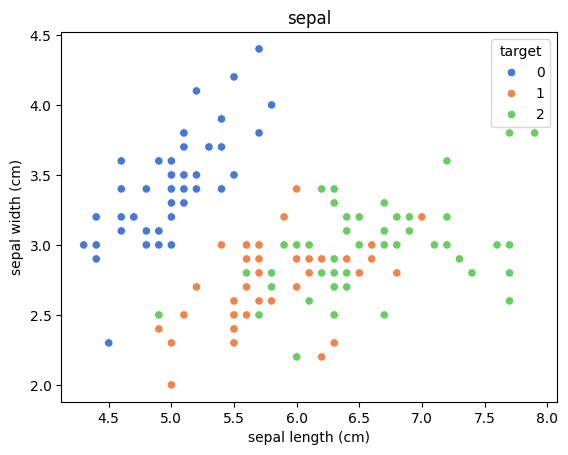

In [6]:
# sepal(꽃받침) 시각화 확인
sns.scatterplot(
    x = sepal_columns[0],
    y = sepal_columns[1],
    hue = 'target', # 타겟컬럼 별로 색깔을 다르게 구분하겠다는 의미로 사용
    palette='muted',
    data=iris_df
)

plt.title("sepal")
plt.show()

- 타겟의 0번 클래스는 1번, 2번 클래스에 비교해서 `sepal length`와 `sepal width` 두 Feautre 간의 관계성이 확실한 상태로 보인다.
  - 0번 클래스는 확실하게 구분되어 있는 것을 확인할 수 있다.
- 1, 2번 클래스는 0번 클래스에 비해 두 피처간의 관계성이 별로 없어 보인다.
  - 1, 2번 클래스는 서로 산만하게 섞여있는 것을 확인할 수 있다.

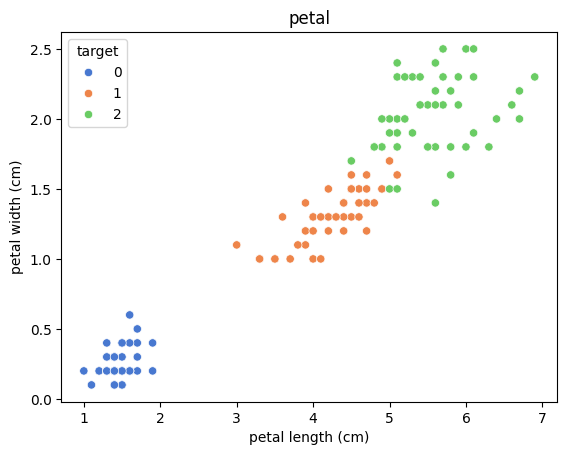

In [7]:
# petal(꽃잎) 시각화
sns.scatterplot(
    x = petal_columns[0],
    y = petal_columns[1],
    hue = 'target',
    palette='muted',
    data=iris_df
)

plt.title("petal")
plt.show()

- 타겟의 모든 클래스에 대해 `petal length`, `petal width` 두 피처 사이의 분산이 잘 나타나고 있는 것을 확인할 수 있다.
- sepal과 관련된 두 피처보다 petal과 관련된 두 피처가 PCA의 차원축소 과정에서 데이터의 변동성(분산)을 가장 잘 표현하는 중요 피처로 사용될 확률이 높다.

### 1. PCA 차원 변환 - 4차원에서 2차원으로 축소하는 경우

In [8]:
## 4차원 피처 데이터를 2차원으로 축소
# decomposition : 분해
from sklearn.decomposition import PCA

# PCA 객체 생성, 파라미터 지정
pca_2 = PCA(n_components=2) # 축소할 차원 지정

# PCA 객체에 데이터 입력 - fit()
pca_2.fit(iris_df.drop("target", axis=1)) # 피처 데이터만 입력, 타겟은 확인용으로 가져왔기 때문에

# PCA의 목적 : 차원 축소를 통해 데이터 변환을 수행 - transform()
iris_pca_2 = pca_2.transform(iris_df.drop("target", axis=1))

# 축소된 차원 확인 => 2차원
iris_pca_2.shape

(150, 2)

- `n_components` : 축소할 차원, 주성분의 개수, 분산이 가장 큰 벡터의 개수를 지정하는 PCA의 하이퍼 파라미터
- PCA에서 `fit()` : 입력한 데이터 매트릭스의 공분산 행렬($A^TA$)를 만들고, 고유값 분해를 진행해 분산이 가장 큰 `n_components=2` 개의 주성분(특이벡터)을 구한다.
- PCA에서 `transform()` : 차원 축소를 통해 데이터 변환을 수행, 변환된 데이터를 반환한다.
- `fit_transform()`으로 데이터 입력부터 변환까지 한번에 진행할 수 있다.

In [9]:
## PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2"]

iris_pca_2_df = pd.DataFrame(iris_pca_2, columns=pca_columns)

iris_pca_2_df['target'] = target
iris_pca_2_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


- 4차원 피처 데이터가 2차원으로 축소되었을 때 주성분에 대한 타겟(실제)값을 확인할 수 있다
- 주성분 `Component 1`, `Component 2` 컬럼의 값은 선형대수학 관점에서 2차원 공간으로 투영되었을 때의 값이다. 이 값은 2차원 기저 벡터 공간의 좌표라고 볼 수 있다.

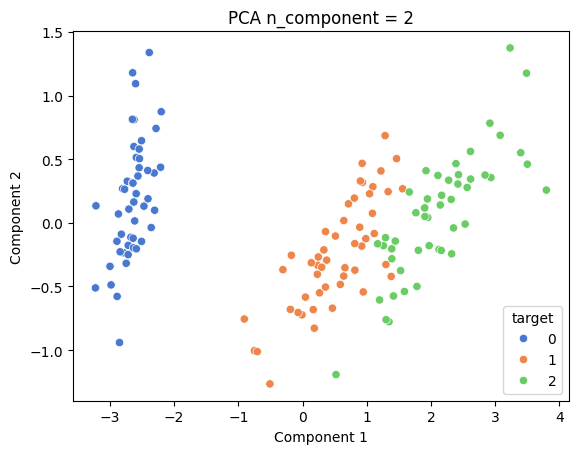

In [10]:
## 차원 축소 후 결과값 시각화 확인
sns.scatterplot(
    x="Component 1",
    y="Component 2",
    hue='target',
    palette='muted',
    data=iris_pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

### 2. PCA 차원 변환 - 4차원에서 3차원으로 축소할 경우

In [11]:
## 4차원에서 3차원으로 차원 축소
pca_3 = PCA(n_components=3)

# fit_transform()으로 데이터 입력부터 변환까지 한번에 진행 가능
iris_pca_3 = pca_3.fit_transform(iris_df.drop("target", axis=1))

# 3차원으로 축소되었는지 확인
iris_pca_3.shape

(150, 3)

In [12]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2", "Component 3"]
iris_pca_3_df = pd.DataFrame(
    iris_pca_3,
    columns=pca_columns
)
iris_pca_3_df['target'] = target
iris_pca_3_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


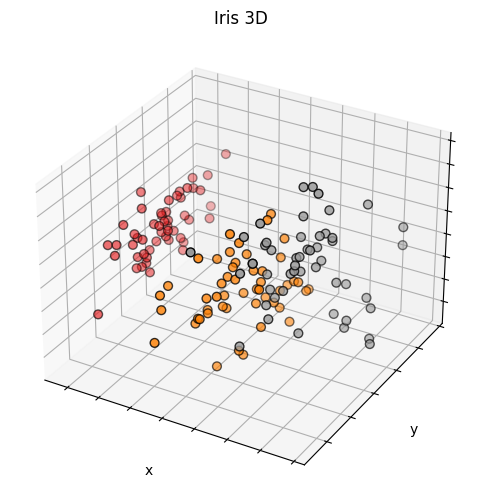

In [13]:
# 3차원 시각화 - Axes3D 이용
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_3_df["Component 1"], # x축 데이터
           iris_pca_3_df["Component 2"], # y축 데이터
           iris_pca_3_df["Component 3"], # z축 데이터
           c=iris_pca_3_df['target'], # 3d scatter의 색깔 기준
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기

plt.show()

- 시각화한 결과 주황색과 회색 데이터 포인트들이 혼잡하게 섞여있는 것을 확인할 수 있다. 아무래도 3차원으로 축소할 경우 2차원으로 축소한 경우보다 `sepla_columns`에 해당하는 피처를 많이 반영하여 데이터 압축이 이루어진 것 같다.
- 3차원 보다 2차원으로 축소한 데이터가 분포도(분산)이 더 크기 때문에, 2차원으로 축소한 데이터를 분석하는 것이 더 편하고 결과적으로 유리할 것으로 판단된다.

### 3. PCA 수행 여부에 따른 지도학습 모델 성능 비교
- PCA 수행하지 않은 데이터를 적용한 모델과 PCA 수행 후 데이터를 적용한 모델의 성능 비교

In [24]:
## PCA로 차원축소를 하지 않은 원본 데이터를 모델에 적용
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_clf = LogisticRegression()

scores = cross_val_score(
    lr_clf,
    data,
    target,
    scoring="accuracy",
    cv=3
)

## 원본 데이터를 넣었을 때 모델의 정확도 확인
print("원본 데이터의 정확도 : {:.3f}".format(np.mean(scores)))

원본 데이터의 정확도 : 0.973


In [25]:
## PCA로 입력 데이터를 2차원으로 축소한 후 모델에 적용

lr_reg = LogisticRegression()

pca_X = iris_pca_2_df[['Component 1', 'Component 2']]

scores_pca = cross_val_score(
    lr_reg,
    pca_X,
    iris_pca_2_df['target'],
    scoring='accuracy',
    cv=3
)

# PCA로 입력 데이터를 2차원으로 축소한 후 모델에 적용시 정확도 평균 확인
print("PCA 변환 후 평균 정확도 : {:.3f}".format(np.mean(scores_pca)))

PCA 변환 후 평균 정확도 : 0.960


- PCA를 수행하지 않은 데이터를 학습한 모델보다 PCA를 수행한 데이터를 학습한 모델의 성능이 떨어지긴 했으나, 모델이 기존 데이터의 절반정도만 사용해서 비슷한 성능을 만들었다고 볼 수 있다.
- 즉, 후자가 좀 더 가성비가 높은 모델이라고 볼 수 있다.
- PCA 사용해 변환된 데이터를 사용한 모델의 성능이 더 나아질 수 도 있다.
  - 최소한 PCA를 사용하지 않은 경우와 비슷한 수준이기 때문에 PCA 수행한 입력 데이터를 지도학습 모델에 적용하는 것도 권장한다.

## LDA(Linear Discriminant Analysis)
- 선형 판별 분석법
- 분류기(Classification) 전용 차원 축소 알고리즘
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법

### PCA와 LDA의 차원 축소 기준 차이점
- LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 **개별 클래스를 분별할 수 있는 기준을 최대한 유지**하면서 차원을 축소한다.
- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾는다.
- LDA는 **입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축**을 찾는다.
  - 같은 클래스의 데이터는 최대한 근접해서, 다른 클래스의 데이터는 최대한 떨어뜨리는 축 매핑을 수행한다.



### LDA 차원 축소 방식
- LDA는 **특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해** 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원을 축소
- **클래스 간 분산은 최대한 크게 가져가고, 클래스 내부 분산은 최대한 작게 가져간다.**

### LDA 절차
LDA는 공분산 행렬이 아닌 클래스간 분산과 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다.

1. 클래스 내부와 클래스 간 분산행렬 구한다.
  - 이 두개의 행렬은 입력 데이터의 클래스 별로 개별 피처의 평균벡터를 기반으로 구한다.
2. 클래스 내부 분산 행렬($S_W$), 클래스 간 분산 행렬($S_B$)를 고유벡터로 분해한다.
  - $S_W^T S_B = \begin{bmatrix} e_1 & \ldots & e_n \end{bmatrix} \begin{bmatrix} \lambda_1 & \ldots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \dots & λ_N  \end{bmatrix} \begin{bmatrix} e_1^T \\ \vdots \\ e_N^T \end{bmatrix}$
3. 고윳값이 가장 큰 순으로 K개 추출
  - 고유값의 개수(K) = LDA의 변환 차수
4. 고윳값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

### 사이킷런에서 LDA 차원축소 알고리즘
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
```

- PCA와 마찬가지로 하이퍼 파라미터 `n_components`에 축소할 차원의 차수를 지정
  - 클래스를 가장 잘 분류할 수 있는 고유벡터 축 생성 개수 의미

## LDA 실습
- 입력 데이터에 대한 결정 클래스를 가장 잘 분리해줄 수 있는 방향으로 차원 축소

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2) # 클래스를 가장 잘 판별(분류)할 수 있는 축을 2개 생성하겠다는 의미

# LDA는 클래스의 정보를 같이 입력하는 형태로 데이터를 입력 - fit(feature, target)
lda.fit(data, target)

LinearDiscriminantAnalysis(n_components=2)

In [17]:
# 데이터 변환
iris_lda = lda.transform(data)

# 2차원으로 축소 확인
iris_lda.shape

(150, 2)

In [18]:
# 시각화
iris_lda_df = pd.DataFrame(
    data=iris_lda,
    columns=["c1", "c2"]
)

iris_lda_df['target'] = iris.target
iris_lda_df.head()

,c1,c2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


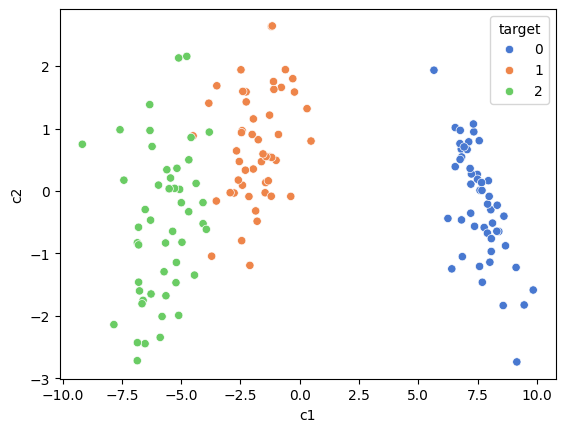

In [19]:
sns.scatterplot(
    x="c1",
    y="c2",
    hue='target',
    palette='muted',
    data=iris_lda_df
)

plt.show()

## SVD(Singular Value Decomposition)
- 특이값 분해
- 고유분해와 더불어 대표적인 행렬 분해 방법
- 고유분해는 정방행렬에 대해서만 분해가 가능하지만, 특이값 분해는 행과 열의 크기가 다른 행렬도 분해가 가능하다.

$$
A = UΣV^T
$$
> - $A$ : 원본행렬, $U$ : 왼쪽 특이(직교)행렬 $Σ$ : 특이값행렬 $V^T$ : 오른쪽 특이(직교)행렬

- 특이벡터(Singular Vector) : 행렬 $U$와 $V$에 속한 벡터. 모든 특이 벡터는 서로 직교하는 성질을 갖는다.
  - $$U^TU = I, V^TV = I$$
- Σ는 대각행렬이며 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0
  - Σ에 0이 아닌 값, 대각에 위치한 값은 행렬 A의 특잇값이 된다.

### SVD 유형
$$
A ∈ \mathbf{R}^{N \times M}, N > M
$$

$$
A = \sum_{i=1}^M σ_i A_i = \sum_{i=1}^M σ_i v_i v_i^T
$$

1. Full SVD
2. Compact SVD
  - 특이값행렬 Σ의 비대각 부분과 대각원소가 0인 부분을 제거한다.
3. Truncated SVD
  - Truncated : 잘려진, 절단된, 제거된
  - 대각 원소 가운데 상위 r개만 추출하여 차원을 축소한다.
  - 원본 데이터와 똑같지는 않아도 가장 비슷한 데이터로 압축하는 것
  - 특이값 $σ_i$은 인덱스 $i$가 작을 수록 특이값이 크다는 점을 이용해 상위 r개의 특이값에 집중
    - 특이값 $σ_i$은 내림차순으로 정렬되어 있다.
  - 특이값이 클 수록 원본 데이터에 대한 반영비율이 크다는 점을 이용
    - 특이값 중 $σ_1$이 가장 크기 때문에 특이벡터 $v_1$은 원본 행렬 $A$를 가장 잘 반영한 벡터로 볼 수 있다.

### Truncated SVD 행렬 분해의 의미
- SVD는 차원 축소를 위한 행렬 분해를 통해 잠재 요인(Latent Factor)을 찾을 수 있다.
  - Latent Factor : 원래 행렬을 가장 잘 나타낼 수 있는 잠재적인 행렬
  - Latent Factor는 추천 엔진, 문서의 잠재의미 등 많은 분야에서 활용 된다.
- SVD로 분해된 행렬을 다시 이용하여 원복된 데이터 셋은 잡음이 제거된 형태로 재구성된다.
  - 잡음 : 결과에 영향이 미미한 부분. 노이즈  피처 데이터로 본다.
  - 즉, SVD로 분해된 행렬은 데이터를 표현하기 위한 중요한 성질만 남게 된다.

### 사이킷런에서 `TrucatedSVD`
```python
from sklearn. decomposition import TruncatedSVD
```

- 하이퍼 파라미터 `n_components`에 축소할 차원의 차수를 지정
  - 사용할 상위 n개의 특이값에 대한 개수를 지정
  - 잠재 요인(Latent Factor)의 개수 지정

## SVD 실습

- 행렬 A에 대해 특이분해를 바로 할 수 없기 때문에

$$
A = V Σ V^T
$$

- 행렬 A를 공분산행렬로 만들어서 고유 분해를 통해 특이 분해를 할 수 있었다.

$$
A^TA = VΛV^T = V Σ^2 V^T
$$

In [20]:
from sklearn. decomposition import TruncatedSVD

t_svd = TruncatedSVD(n_components=2) # 상위 2개의 특잇값만 사용하겠다는 의미 => 특잇값으로 특이 벡터를 찾아줄 예정

# 원래 iris 입력 데이터(feature)를 최대한 잘 표현할 수 있는 상위 2개의 특이벡터에 투영된 데이터
iris_svd = t_svd.fit_transform(data)

# 2차원 축소 확인
iris_svd.shape

(150, 2)

In [21]:
# 데이터프레임으로 변환해서 확인
iris_svd_df = pd.DataFrame(
    data=iris_svd,
    columns=["c1", "c2"]
)

iris_svd_df['target'] = target
iris_svd_df.head()

,c1,c2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


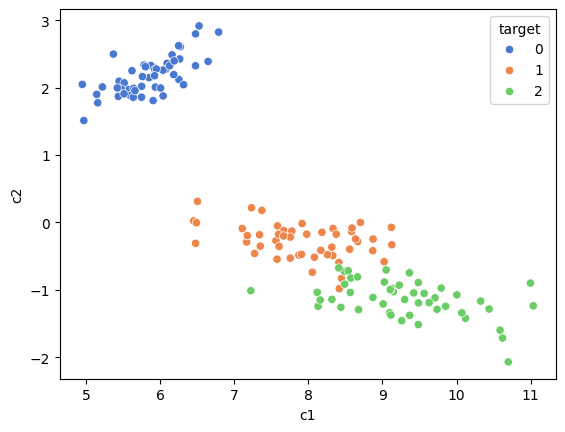

In [22]:
# 시각화
sns.scatterplot(
    x="c1",
    y="c2",
    hue='target',
    palette='muted',
    data=iris_svd_df
)

plt.show()

### PCA와 SVD의 관계
- PCA와 SVD는 사실상 똑같은 방식으로 차원 축소를 진행한다.
- PCA는 공분산행렬 $A^TA$을 분해해서 공분산을 가장 잘 나타낼 수 있는 벡터축(주성분)을 찾는 방식
- SVD도 특이값분해를 하지만 결국 특이값분해를 하기 위해 공분산 행렬을 구해 원본 행렬을 가장 잘 반영하는 특이벡터를 찾는 방식
- 데이터 전처리로 표준화(Standard Scaling) 수행 후 PCA, SVD를 수행하면 같은 값이 나온다.
  - 즉, 데이터의 평균, 분산, 표준편차가 표준화되면 PCA, SVD에서 구하는 것이 같기 때문에 같은 값이 나온다.

Text(0.5, 1.0, 'PCA Transformed')

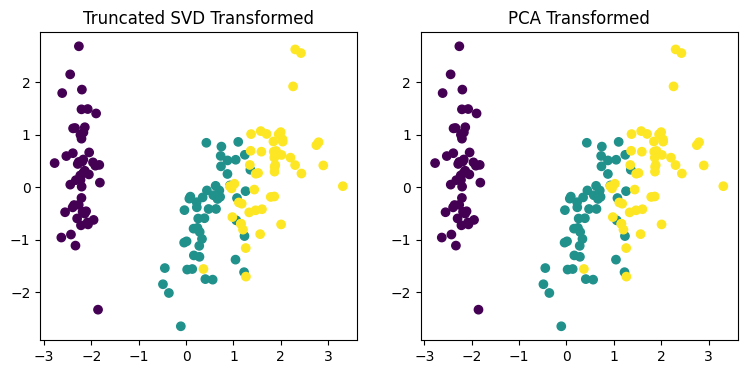

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 스케일링된 데이터를 `PCA`, `TruncatedSVD`를 이용해 같은 차원으로 축소 했을 때, 두 알고리즘에서 변환된 데이터가 일치하다는 것을 확인할 수 있다.